In [14]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from util.dataset_util import read_data, project_3d_to_2d, plot_over_image
from util.signature_util import SignatureVisualizer

In [15]:
# path to the parent directory (contains test/ meta/)
dataset_name = 'chi3d'
signature_template_path = '../info'

In [16]:
data_root = '../../datasets'
subset = 'train' # select from ['train']
subj_name = 's02' # subject names for 'train' subset
action_name = 'Grab 4'#  # action names
camera_name = '50591643' # select from ['50591643', '58860488', '60457274', '65906101']
subject = 'w_markers'  # select from ['w_markers', 'wo_markers'] for "chi3d" and only ['w_markers'] for "humansc3d", "fit3d"

In [17]:
frames, j3ds, cam_params, gpp_data, smplx_param_data, annotations = read_data(data_root, 
                                                                            dataset_name, 
                                                                            subset, 
                                                                            subj_name, 
                                                                            action_name, 
                                                                            camera_name,
                                                                            subject=subject)

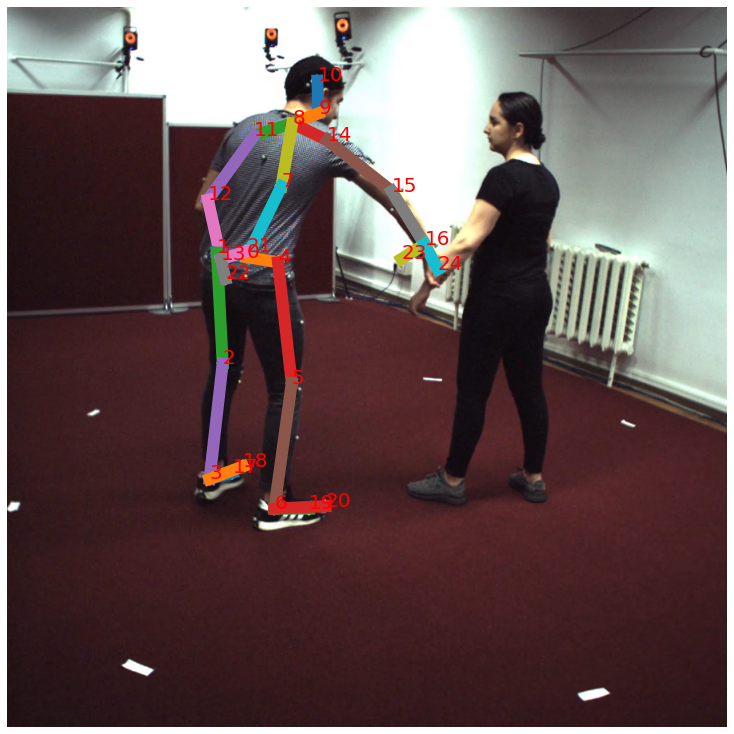

In [18]:
frame_id = annotations[action_name]['fr_id']
j3d = j3ds[frame_id]
j3d_in_camera = np.matmul(np.array(j3d) - cam_params['extrinsics']['T'], np.transpose(cam_params['extrinsics']['R']))
frame = frames[frame_id]
j2d_camera = project_3d_to_2d(j3d_in_camera, cam_params['intrinsics_w_distortion'], 'w_distortion')
plot_over_image(frame, j2d_camera)

# GHUM posing, rendering and signature visualization

In [19]:
from util.ghum_util import GHUMHelper
GHUM_Models_Path = '../../ghumrepo/ghum/shmodels'
ghum_helper = GHUMHelper(GHUM_Models_Path)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.saving.saved_model.load.LBSLayer object at 0x7ef8e718ab70> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ef8e7179f98>).


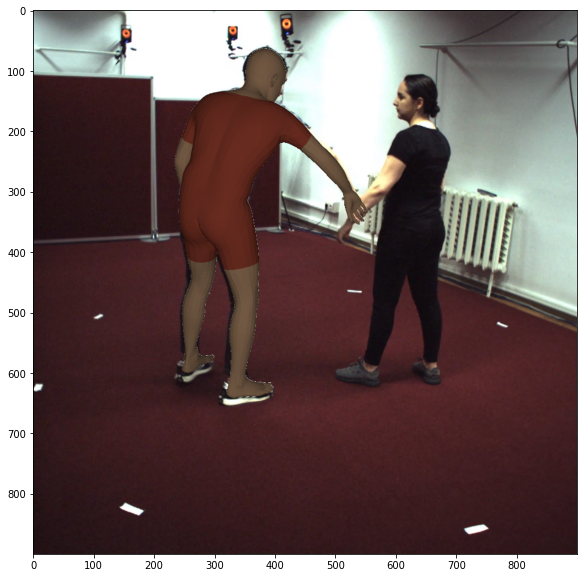

In [20]:
world_gpp = ghum_helper.get_world_gpp(gpp_data)
world_posed_data = ghum_helper.ghum_model.pose(world_gpp)
rendered_image = ghum_helper.render(world_posed_data.vertices[frame_id], frame, cam_params, vertices_in_world=True)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

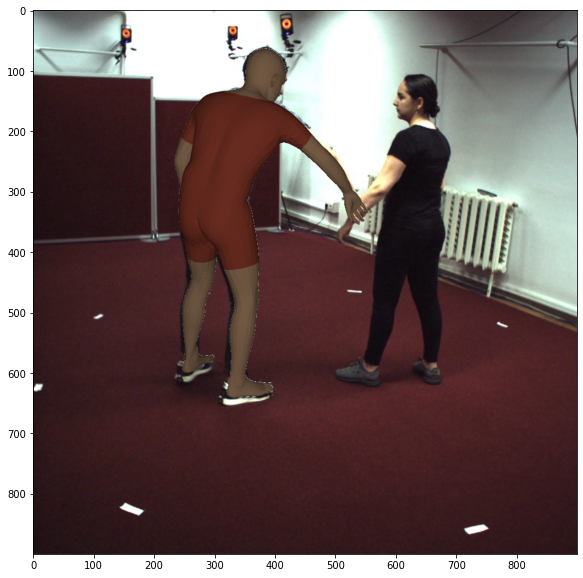

In [21]:
camera_gpp = ghum_helper.get_camera_gpp(gpp_data, cam_params)
camera_posed_data = ghum_helper.ghum_model.pose(camera_gpp)
rendered_image = ghum_helper.render(camera_posed_data.vertices[frame_id], frame, cam_params, vertices_in_world=False)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

In [22]:
ghum_signature_visualizer = SignatureVisualizer(path_to_template=signature_template_path, 
                                      model_type='GHUM', 
                                      models_path=GHUM_Models_Path)
scene = ghum_signature_visualizer.interaction_contact_signature(annotations[action_name]['ghum_signature'])
scene.show()


Two checkpoint references resolved to different objects (<tensorflow.python.keras.saving.saved_model.load.LBSLayer object at 0x7ef8e860b6d8> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ef8e85fdb00>).


# SMPLX posing, rendering and signature visualization

In [23]:
from util.smplx_util import SMPLXHelper
SMPLX_Models_Path = '../../smplx_body_models'
smplx_helper = SMPLXHelper(SMPLX_Models_Path)

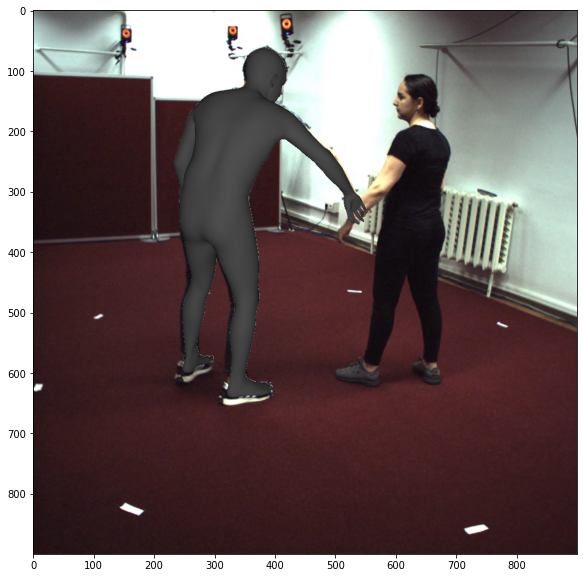

In [24]:
world_smplx_params = smplx_helper.get_world_smplx_params(smplx_param_data)
world_posed_data = smplx_helper.smplx_model(**world_smplx_params)
rendered_image = smplx_helper.render(world_posed_data.vertices[frame_id], frame, cam_params, vertices_in_world=True)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

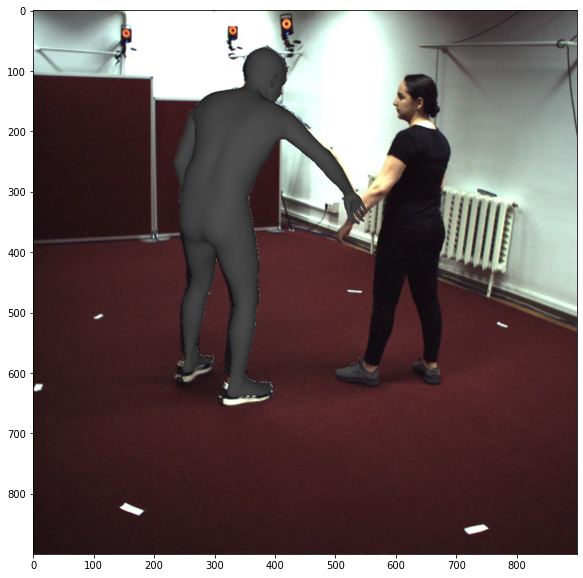

In [25]:
camera_smplx_params = smplx_helper.get_camera_smplx_params(smplx_param_data, cam_params)
camera_posed_data = smplx_helper.smplx_model(**camera_smplx_params)
rendered_image = smplx_helper.render(camera_posed_data.vertices[frame_id], frame, cam_params, vertices_in_world=False)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

In [26]:
smplx_signature_visualizer = SignatureVisualizer(path_to_template=signature_template_path, 
                                      model_type='SMPLX', 
                                      models_path=SMPLX_Models_Path)        
scene = smplx_signature_visualizer.interaction_contact_signature(annotations[action_name]['smplx_signature'])
scene.show()